In [1]:
import os

In [2]:
OG_RESULTS_DIR = '/home/rdr2143/transferability-adv-patches/results-adv/results/yolor/trained-v1-patch/og'
PATCHED_RESULTS_DIR = '/home/rdr2143/transferability-adv-patches/results-adv/results/yolor/trained-v1-patch/patched'

In [3]:
original_img_files = sorted(os.listdir(OG_RESULTS_DIR))
patched_img_files = sorted(os.listdir(PATCHED_RESULTS_DIR))

In [4]:
def get_number_of_people_map(dir_path, file_paths):
    img_number_to_number_of_persons = {}
    for each in file_paths:
        img_number = each.split("_")[0]
        data = open(dir_path+'/'+each, 'r')
        number_of_people = 0
        for each in data.readlines():
            val = int(each.split(" ")[0])
            if val == 0:
                number_of_people += 1
        if number_of_people > 0:
            img_number_to_number_of_persons[img_number] = number_of_people
    return img_number_to_number_of_persons

def run_analysis(verbose=False):
    og_map = get_number_of_people_map(OG_RESULTS_DIR, original_img_files)
    patched_map = get_number_of_people_map(PATCHED_RESULTS_DIR, patched_img_files)
    total_people = 0
    people_detected = 0
    for k, v in og_map.items():
        if k in patched_map:
            if v >= patched_map[k]:
                if verbose and v == patched_map[k]:
                    print(f'Image: {k}, diff: {v - patched_map[k]}, total: {v}')
                total_people += v
                people_detected += patched_map[k]
        else:
            if verbose:
                print(f'None deteceted. Image: {k}, total: {v}')
            total_people += v
    print(people_detected, total_people)
    return people_detected/total_people * 100

In [5]:
run_analysis(False)

2113 2289


92.31105286151158

In [7]:
from torchvision import transforms
from PIL import Image

def read_image(path):
    """
    Read an input image to be used as a patch

    :param path: Path to the image to be read.
    :return: Returns the transformed patch as a pytorch Tensor.
    """
    patch_img = Image.open(path).convert('RGB')
    tf = transforms.Resize((1920, 1920))

    patch_img = tf(patch_img)
    tf = transforms.ToTensor()

    adv_patch_cpu = tf(patch_img)
    return adv_patch_cpu

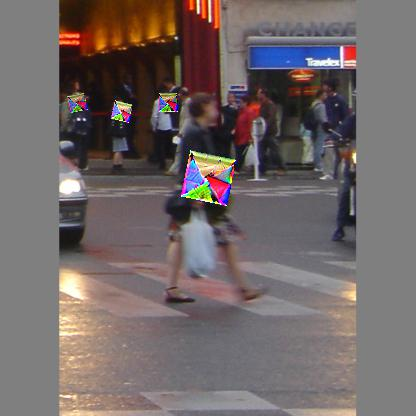

In [26]:
from IPython.display import Image as IpythonImage
IpythonImage(filename='/home/rdr2143/waymo-adv-dataset/adv/patched/99_patched_img.jpg') 
